## Import

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

In [15]:
# One-hot encoding
encoder = OneHotEncoder(categories='auto', sparse_output=False)

# Carica i file di addestramento e test per ciascun dataset dal percorso specificato
monk1_train = pd.read_csv('../Datasets/Monks/monks-1.train', sep='\s+', header=None)
monk1_test = pd.read_csv('../Datasets/Monks/monks-1.test', sep='\s+', header=None)

monk2_train = pd.read_csv('../Datasets/Monks/monks-2.train', sep='\s+', header=None)
monk2_test = pd.read_csv('../Datasets/Monks/monks-2.test', sep='\s+', header=None)

monk3_train = pd.read_csv('../Datasets/Monks/monks-3.train', sep='\s+', header=None)
monk3_test = pd.read_csv('../Datasets/Monks/monks-3.test', sep='\s+', header=None)


# Lista per memorizzare i dataset trasformati
monks_train = []
monks_test = []


# Dataset monk1
X1_train = monk1_train.iloc[:, 1:7].values  # Caratteristiche
y1_train = monk1_train.iloc[:, 0].values    # Etichette

X1_test = monk1_test.iloc[:, 1:7].values
y1_test = monk1_test.iloc[:, 0].values

# Applicazione dell'encoder a monk1
X1_train_encoded = encoder.fit_transform(X1_train)  # Fit e trasformazione sui dati di training
X1_test_encoded = encoder.transform(X1_test)        # Solo trasformazione sui dati di test

monks_train.append((X1_train_encoded, y1_train))
monks_test.append((X1_test_encoded, y1_test))

# Dataset monk2
X2_train = monk2_train.iloc[:, 1:7].values
y2_train = monk2_train.iloc[:, 0].values

X2_test = monk2_test.iloc[:, 1:7].values
y2_test = monk2_test.iloc[:, 0].values

# Applicazione dell'encoder a monk2
X2_train_encoded = encoder.fit_transform(X2_train)
X2_test_encoded = encoder.transform(X2_test)

monks_train.append((X2_train_encoded, y2_train))
monks_test.append((X2_test_encoded, y2_test))

# Dataset monk3
X3_train = monk3_train.iloc[:, 1:7].values
y3_train = monk3_train.iloc[:, 0].values

X3_test = monk3_test.iloc[:, 1:7].values
y3_test = monk3_test.iloc[:, 0].values

# Applicazione dell'encoder a monk3
X3_train_encoded = encoder.fit_transform(X3_train)
X3_test_encoded = encoder.transform(X3_test)

monks_train.append((X3_train_encoded, y3_train))
monks_test.append((X3_test_encoded, y3_test))

Epoca 1/50 - Loss: 1.0239, Train Acc: 0.5000, Val Acc: 0.5000
Epoca 2/50 - Loss: 0.7185, Train Acc: 0.5081, Val Acc: 0.4907
Epoca 3/50 - Loss: 0.6939, Train Acc: 0.4919, Val Acc: 0.4444
Epoca 4/50 - Loss: 0.7623, Train Acc: 0.5000, Val Acc: 0.4444
Epoca 5/50 - Loss: 0.7294, Train Acc: 0.4919, Val Acc: 0.4352
Epoca 6/50 - Loss: 0.6689, Train Acc: 0.5000, Val Acc: 0.4421
Epoca 7/50 - Loss: 0.6121, Train Acc: 0.5000, Val Acc: 0.4468
Epoca 8/50 - Loss: 0.6837, Train Acc: 0.5000, Val Acc: 0.4468
Epoca 9/50 - Loss: 0.6698, Train Acc: 0.5000, Val Acc: 0.4537
Epoca 10/50 - Loss: 0.7065, Train Acc: 0.5403, Val Acc: 0.4583
Epoca 11/50 - Loss: 0.6593, Train Acc: 0.5403, Val Acc: 0.4722
Epoca 12/50 - Loss: 0.6244, Train Acc: 0.5726, Val Acc: 0.4815
Epoca 13/50 - Loss: 0.6695, Train Acc: 0.5968, Val Acc: 0.4884
Epoca 14/50 - Loss: 0.7082, Train Acc: 0.5726, Val Acc: 0.4884
Epoca 15/50 - Loss: 0.6823, Train Acc: 0.5726, Val Acc: 0.4977
Epoca 16/50 - Loss: 0.6341, Train Acc: 0.5726, Val Acc: 0.5023
E

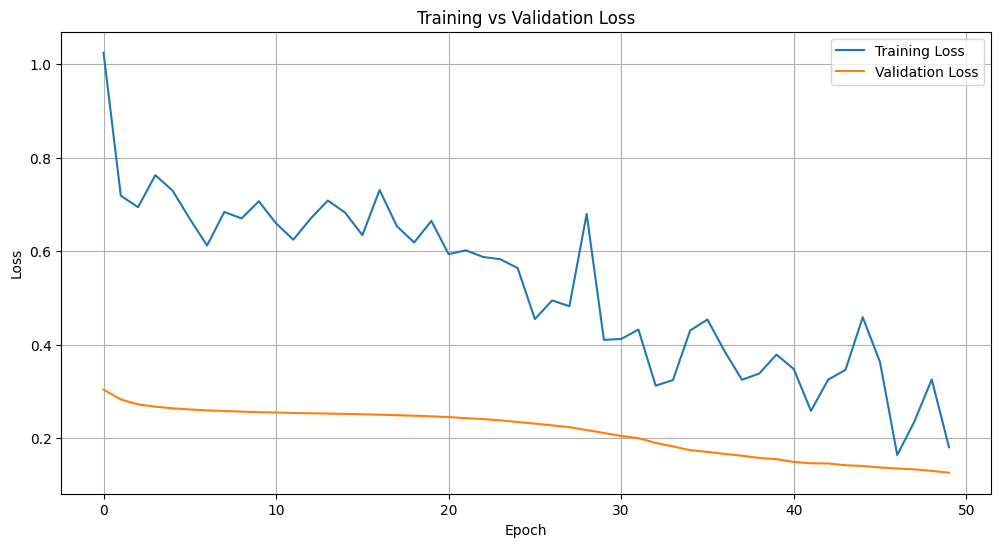

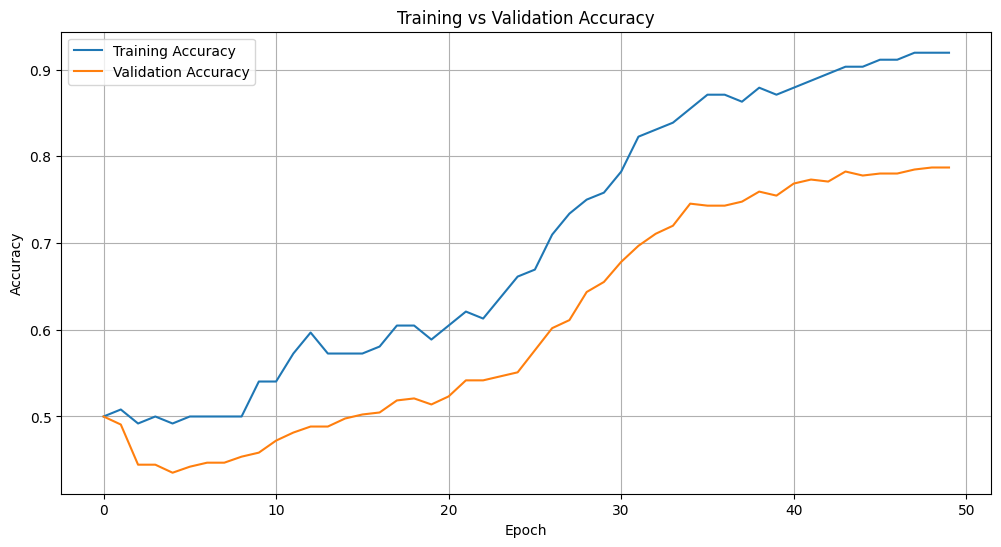

In [16]:
# Parametri della rete neurale
hidden_units = (10, 10)  # Layer nascosti
alpha = 0.0001  # Regolarizzazione L2
max_epochs = 50  # Numero di epoche
batch_size = 16  # Dimensione del minibatch

# Inizializziamo il modello con Nesterov momentum
mlp = MLPClassifier(hidden_layer_sizes=hidden_units, activation='relu',
                    solver='sgd', alpha=alpha, learning_rate_init=0.01,
                    momentum=0.9, nesterovs_momentum=True, max_iter=1,
                    warm_start=True, random_state=42)

# Monitoraggio delle performance
training_loss = []
validation_loss = []
training_acc = []
validation_acc = []

# Training manuale per epoche
for epoch in range(max_epochs):
    # Shuffling dei dati per ogni epoca
    indices = np.random.permutation(len(X1_train_encoded))
    X_train_shuffled = X1_train_encoded[indices]
    y_train_shuffled = y1_train[indices]
    
    # Addestriamo il modello in minibatch
    for start_idx in range(0, len(X1_train_encoded), batch_size):
        end_idx = start_idx + batch_size
        X_batch = X_train_shuffled[start_idx:end_idx]
        y_batch = y_train_shuffled[start_idx:end_idx]
        mlp.partial_fit(X_batch, y_batch, classes=np.unique(y1_train))
    
    # Monitoraggio delle metriche
    training_loss.append(mlp.loss_)
    training_acc.append(accuracy_score(y1_train, mlp.predict(X1_train_encoded)))
    validation_acc.append(accuracy_score(y1_test, mlp.predict(X1_test_encoded)))
    
    # Calcolo della validation loss manualmente
    val_loss = np.mean((mlp.predict_proba(X1_test_encoded) - np.eye(len(np.unique(y1_test)))[y1_test])**2)
    validation_loss.append(val_loss)
    
    print(f"Epoca {epoch+1}/{max_epochs} - Loss: {mlp.loss_:.4f}, "
          f"Train Acc: {training_acc[-1]:.4f}, Val Acc: {validation_acc[-1]:.4f}")

# Plot delle metriche
plt.figure(figsize=(12, 6))
plt.plot(training_loss, label="Training Loss")
plt.plot(validation_loss, label="Validation Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(training_acc, label="Training Accuracy")
plt.plot(validation_acc, label="Validation Accuracy")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()